# <font color="darkblue"> Prática 01: Perceptron Learning Algorithm (PLA) </font>




**Objetivos:**


*   Entender o funcionamento do PLA e dos componentes de aprendizagem.
*   Fixar o conceito de aprendizagem.



**Descrição:**

Crie uma dataset $D$ com 1000 pontos e uma função alvo $f$ para compreender o funcionamento do PLA. Para visualizar os passos do algoritmo, considere $d=2$ e assuma $X=[-1,1]\times[-1,1]$, em que $x\in X$ é escolhido com probabilidade uniforme. Escolha uma reta como função alvo, em que um lado da reta seja mapeado para $+1$ e o outro para $-1$. Gere então pontos aleatórios $x_i$ e obtenha sua classificação $y_i$ a partir da função alvo. Divida os dados em um grupo de treinamento e outro de teste. 

Após a preparação dos dados, crie uma função $PLA()$ que inicia com os pesos todos iguais a zero e, a cada iteração, deixe o algoritmo escolher aleatoriamente um dos pontos com classificação incorreta até que ele convirja. Rode o PLA sobre subamostras com $N=10$ e $N=100$, teste a hipótese solução a partir de pontos ainda não vistos (conjunto de teste) e responda a seguinte questão:

- Qual o percentual de pontos classificados corretamente para cada hipótese solução nos conjuntos de treinamento e teste? 










# <font color="darkblue"> Solução </font>


###  Preparação dos dos dados

O objetivo da prepação dos dados é a criação da função alvo e do dataset conforme a descrição do problema. Para tanto, você deve realizar os seguintes passos:

* Crie a função alvo (uma reta) a partir de dois pontos gerados aleatoriamente;
* Calcule o coeficiente angular e o coeficiente linear (bias) e os armazene em variáveis distintas;
* Gere aleatoriamente 1000 pontos, cujas coordenadas estão no intervalo $[-1,1]$, e os adicione em uma lista $X$ correspondendo aos dados da amostra;
* Para cada ponto gerado, use a função sign() de numpy, que recebe como entrada uma reta (função alvo), para obter a classificação de cada ponto. Adicione cada classificação em uma lista $y$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output

# Crie a funcao alvo e o dataset

# Criando pontos aleatórios para construir a reta a partir do coeficiente angular e coeficiente linear

np.random.seed(343234)

ponto1 = np.random.uniform(-1, 1, size = 2)
ponto2 = np.random.uniform(-1, 1, size = 2)

coef_angular = (ponto2[1] - ponto1[1]) / (ponto2[0] - ponto1[0]) # Coeficiente angular: m = (y2 - y1) / (x2 - x1)
coef_linear = ponto2[1] - coef_angular * ponto2[0] # Coeficiente linear: b = y2 - m * x2

# Criando 1000 pontos para compor a amostra

X = np.random.uniform(-1, 1, size=(1000, 2))

# Criando lista de classificação dos pontos

y = []

for p in X:
    y.append(np.sign(p[1] - (coef_angular * p[0] + coef_linear))) # Função sinal para dizer se os pontos estão acima da reta (+1), na reta (0) ou abaixo da reta (-1)

### Visualizando o dataset
Use a função abaixo para visualizar o dataset criado anteriormente.

In [146]:
def show_dataset(X, y, p1, p2, m, b):
    """
    Esta função tem o objetivo de exibir na tela uma amostra do dataset passado por parâmetro.
    
    Paramêtros:
    - X (matriz): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde 
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - p1 (list): Coordenadas do ponto p1 gerado para criar a função alvo.
    - p2 (list): Coordenadas do ponto p2 gerado para criar a função alvo.
    - m (float): Coeficiente angular da função alvo.
    - b (float): Coeficidnte linear da função alvo.
    """
    
    line = np.linspace(-1, 1, 1000) 
    plt.plot(line, m*line + b, label="f(x)", c="green")

    # Pontos usados na criacao da reta
    plt.scatter(p1[0], p1[1], c='green')
    plt.scatter(p2[0], p2[1], c='green')

    for i in range(len(X[:200])):
        if (y[i] == 1):
            plt.scatter(X[i][0], X[i][1], c='blue')
        else:        
            plt.scatter(X[i][0], X[i][1], c='red')

    plt.show()      

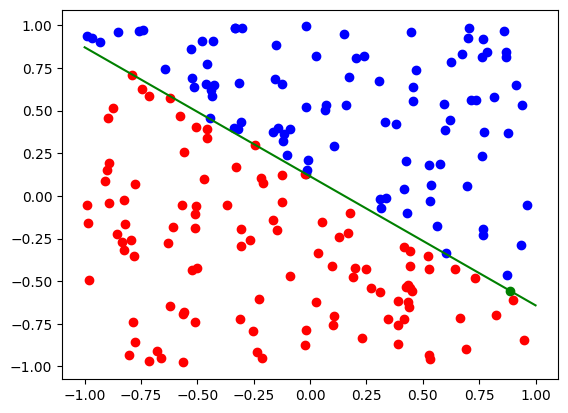

In [147]:
show_dataset(X, y, ponto1, ponto2, coef_angular, coef_linear)

### Algoritmo PLA
Complete a função PLA() abaixo para implementar o Algoritmo de Aprendizagem do Perceptron conforme os slides da aula de "Significado de aprendizagem".

In [ ]:
def PLA(X, y, f):
    """
    Esta função corresponde ao Algoritmo de Aprendizagem do modelo Perceptron.
    
    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde 
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear 
    da função alvo.
    
    Retorno:
    - it (int): Quantidade de iterações necessárias para corrigir todos os pontos classificados incorretamente.
    - w (list): Lista de três elementos correspondendo aos pesos do perceptron.
    """
    w = [0, 0, 0] # Criando vetor W com coordenadas zeradas
    listaPCI = X
    new_y = [] # Criando vetor para acompanhar a mudança de classificação dos pontos
    it = 0
    
    while (len(listaPCI) > 0):
        ponto_escolhido = random.choice(listaPCI) # Usando random.choice() para escolher aleatoriamente um elemento do vetor listaPCI

        indice = np.where(X == ponto_escolhido)[0][0] # Buscando o índice do qual o ponto escolhido se encontra no vetor X

        w = w + (y[indice] * np.array([1, ponto_escolhido[0], ponto_escolhido[1]])) # Realizando w += yi * xi, como W tem 3 coordenadas e X duas,
                                                                                    # acrescentei uma coordenada em X para que a operação fosse válida,
                                                                                    # onde W0 = -b e X0 = 1, mas nesse caso W0 = 0 pois nos foi solicitado
        
        # Aqui você deverá contruir a lista de pontos classificados incorretamente

        listaPCI, new_y = constroiListaPCI(X, y, w)
        
        # Após atualizar os pesos para correção do ponto escolhido, você irá chamar a função plotGrafico()

        plot_grafico(X, new_y, w, f) # Alterei a posição da função plot_gráfico() para que seja possível acompanhar visualmente a mudança de classificação dos pontos
        
        # Incrementando a quantidade de iterações

        it += 1

    return it, w       

### Função para visualização dos passos do PLA
A função abaixo é uma função auxiliar que permite que vocês enxerguem o resultado de cada iteração da função PLA().

In [149]:
%matplotlib inline
def plot_grafico(X, y, w, f):   
    """
    Esta função objetiva a visualização dos passos do PLA.
    
    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde 
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear 
    da função alvo.    
    """
    
    nPontos = len(X)    
    #matplotlib.use('TkAgg')    
            
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.axis([-1, 1, -1, 1])

    x_plt = [X[i][0] for i in range(nPontos)]
    y_plt = [X[i][1] for i in range(nPontos)]

    for i in range(nPontos):
        if (y[i] == 1):
            plt.scatter(x_plt[i], y_plt[i], s=10, c='blue')
        else:
            plt.scatter(x_plt[i], y_plt[i], s=10, c='red')

    x = np.linspace(-1, 1, 1000)
    plt.plot(x, f[0]*x + f[1], c='green') # f[0] = m, f[1] = b
    plt.plot(x, (-w[0] - w[1]*x) / w[2], c='orange') # A*x + B*y + C => y = (-C - A*x) / B
    clear_output(wait=True)    
    plt.show(block=False)    
    plt.pause(0.01)   


### Função para construir lista de pontos classificados incorretamente
Implemente a função abaixo para contruir a lista de pontos classificados incorretamente em cada iteração do loop principal da função PLA().


In [ ]:
def constroiListaPCI(X, y, w):
    """
    Esta função constrói a lista de pontos classificados incorretamente.
    
    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde 
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.
   
    Retorno:
    - l (list): Lista com os pontos classificador incorretamente.
    - new_y (list): Nova classificação de tais pontos.
   
    """
    l = []
    new_y = []

    for p in X:
        produto_interno = (w[0] * 1) + (w[1] * p[0]) + (w[2] * p[1]) # Realizando produto interno de W com cada ponto (ou elemento) da matriz X

        indice = np.where(X == p)[0][0] # Buscando o índice do elemento em X para acessar corretamente o vetor de classificações y
                                        # Não seria necessário buscar o índice caso o laço fosse: for p in range (len(X))

        classificacao = np.sign(produto_interno) # Função sinal para o resultado do produto interno, caso o angulo entre os vetores for obtuso será negativo (-1),
                                                 # caso o angulo entre os vetores for agudo será positivo (+1)

        # Verificando se a classificação de acordo com o Perceptron condiz com a classificação esperada, caso não seja, adicionamos o ponto à lista PCI

        if classificacao != y[indice]: 
            l.append(p)
        
        new_y.append(classificacao) # Nova classificação dos pontos de acordo com a iteração atual do algoritmo
    
    return l, new_y                            

### Treinamento com 10 amostras

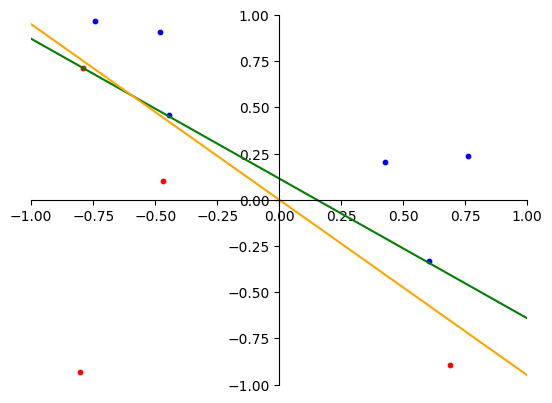

Quantidade de Iterações: 34
Pesos para W0 = 0.0, W1 = 3.04152363954325 e W2 = 3.202488378266557


In [151]:
amostras_teste = X[:10]
classificacao_teste = y[:10]

iteracoes10, pesos10 = PLA(amostras_teste, classificacao_teste, [coef_angular, coef_linear])

print(f"Quantidade de Iterações: {iteracoes10}")
print(f"Pesos para W0 = {pesos10[0]}, W1 = {pesos10[1]} e W2 = {pesos10[2]}")

### Treinamento com 100 amostras

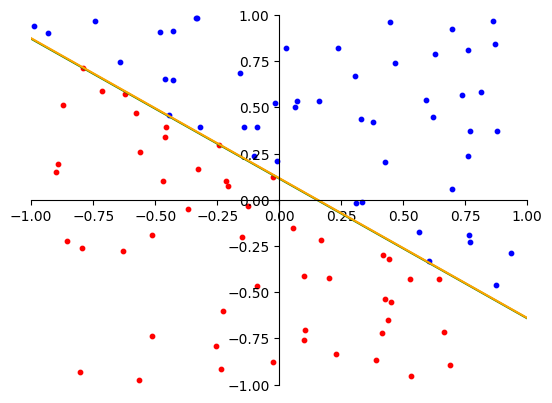

Quantidade de Iterações: 165
Pesos para W0 = -1.0, W1 = 6.47653680749344 e W2 = 8.558578847439362


In [152]:
amostras_teste = X[:100]
classificacao_teste = y[:100]

iteracoes100, pesos100 = PLA(amostras_teste, classificacao_teste, [coef_angular, coef_linear])

print(f"Quantidade de Iterações: {iteracoes100}")
print(f"Pesos para W0 = {pesos100[0]}, W1 = {pesos100[1]} e W2 = {pesos100[2]}")

### Calculando a acurácia

Treine o Modelo de Aprendizagem de Máquina Perceptron com subamostras de tamanhos $N=10$ e $N = 100$, conforme o enunciado, e em seguida verifique a acurácia do modelo com uma subamostra de teste, com pelo menos 100 pontos,
que contém pontos diferentes das subamostras utilizadas para treinamento.

#### Acurácia do treinamento com 10 amostras

In [ ]:
# Selecionando 900 pontos para teste 

classificacao_determinada = []
pontos_para_teste = X[100:]
classificacao_esperada = y[100:]

# Utilizando os pesos determinados pelo Perceptron com 10 amostras para treino para classificar os pontos

for ponto in pontos_para_teste:
    classificacao_determinada.append(np.sign((pesos10[0] * 1) + (pesos10[1] * ponto[0]) + (pesos10[2] * ponto[1])))

# Caso a classificação dos pontos bata com a classificação esperada, adicionamos à contagem de acertos, caso contrário, adicionamos à contagem de erros

acertos = 0
erros = 0

for i in range(len(pontos_para_teste)):
    if classificacao_esperada[i] == classificacao_determinada[i]:
        acertos += 1
    else:
        erros += 1

acuracia = (acertos / len(pontos_para_teste)) * 100

print(f"Pontos utilizados para o teste: {len(pontos_para_teste)}")
print(f"Pontos classificados corretamente: {acertos}")
print(f"Pontos classificados incorretamente: {erros}")
print(f"Acurácia: {acuracia}%")

Pontos utilizados para o teste: 900
Pontos classificados corretamente: 844
Pontos classificados incorretamente: 56
Acurácia: 93.77777777777779%


#### Acurácia do treinamento com 100 amostras

In [ ]:
# Selecionando 900 pontos para teste 

classificacao_determinada = []
pontos_para_teste = X[100:]
classificacao_esperada = y[100:]

# Utilizando os pesos determinados pelo Perceptron com 100 amostras para treino para classificar os pontos

for ponto in pontos_para_teste:
    classificacao_determinada.append(np.sign((pesos100[0] * 1) + (pesos100[1] * ponto[0]) + (pesos100[2] * ponto[1])))

# Caso a classificação dos pontos bata com a classificação esperada, adicionamos à contagem de acertos, caso contrário, adicionamos à contagem de erros

acertos = 0
erros = 0

for i in range(len(pontos_para_teste)):
    if classificacao_esperada[i] == classificacao_determinada[i]:
        acertos += 1
    else:
        erros += 1

acuracia = (acertos / len(pontos_para_teste)) * 100

print(f"Pontos utilizados para o teste: {len(pontos_para_teste)}")
print(f"Pontos classificados corretamente: {acertos}")
print(f"Pontos classificados incorretamente: {erros}")
print(f"Acurácia: {acuracia}%")

Pontos utilizados para o teste: 900
Pontos classificados corretamente: 900
Pontos classificados incorretamente: 0
Acurácia: 100.0%
